In [1]:
source("~/software/notebook_assist/packages.R")
source("~/software/notebook_assist/functions.R")




In [2]:
theme_bw2 = theme_bw() +
    theme(
        axis.text = element_text(size = 8),
        strip.text = element_text(size = 8),
        axis.title = element_text(size = 8),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 8),
        legend.position = "top"
    )

## Figure 2A

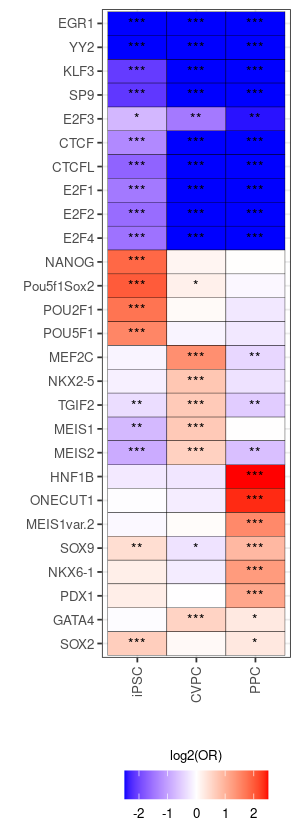

In [3]:
repo_path = "/home/tarthur/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/"
all_enrich = fread(paste0(repo_path,"SOURCEDATA.FIGURE2A.txt"),sep="\t",data.table=F)
all_enrich$Tissue = factor(all_enrich$Tissue, levels = c("iPSC","CVPC","PPC"))


tf_toplot = all_enrich %>% filter(Database == "JASPAR" | TF == "NANOG")

tf_toplot = tf_toplot[ tf_toplot$TF %in% c("MEIS2","MEF2C","SOX2","POU5F1","ONECUT1","NKX2-5","NANOG","PDX1","NKX6-1","HNF1B","GATA4","CTCF","EGR1","E2F2","E2F5",
                                                "SOX9","Pou5f1Sox2","E2F4","E2F3","E2F1","MEIS1","TGIF2","MEIS1var.2","KLF3","SP9","YY2","POU2F1","CTCFL"),]
tf_toplot$Significance = ifelse(tf_toplot$AdjustedPvalue < 5e-10, "***",
                                  ifelse(tf_toplot$AdjustedPvalue < 5e-3, "**",
                                         ifelse(tf_toplot$AdjustedPvalue < 0.05, "*", "")))
tf_toplot$`log2(OR)` = log2(tf_toplot$OddsRatio)

tf_toplot$`log2(OR)`[ tf_toplot$`log2(OR)` < -2.5 ] = -2.5
tf_toplot$`log2(OR)`[ tf_toplot$`log2(OR)` > 2.5 ] = 2.5
tf_toplot$Tissue = factor(tf_toplot$Tissue , levels = c("iPSC","CVPC","PPC","Shared"))

cast = reshape2::dcast(Tissue ~ TF, data = tf_toplot, fun.aggregate = mean, value.var = "log2(OR)")
rownames(cast) = cast$Tissue
cast$Tissue = NULL

ord = hclust( dist(t(cast), method = "euclidean"), method = "ward.D" )$order

tf_toplot$TF = factor(tf_toplot$TF, levels = rev(colnames(cast[,ord])))

psize(2.5, 7)
a <- ggplot(tf_toplot, aes(Tissue, TF, fill= `log2(OR)`)) + theme_bw2 +
  geom_tile(color = "black") +
  geom_text(aes(label=Significance), color="black", size=3) +
    xlab("") + ylab("") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
        legend.position = "bottom") +
  scale_fill_gradient2(low="blue", mid = "white", high="red") +   
  guides(fill = guide_colourbar(title.position="top", title.hjust = 0.5),
         size = guide_legend(title.position="top", title.hjust = 0.5))
a

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


TableGrob (5 x 5) "guide-box": 2 grobs
  z     cells                  name           grob
1 1 (3-3,3-3)                guides gtable[layout]
2 0 (2-4,2-4) legend.box.background zeroGrob[NULL]

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


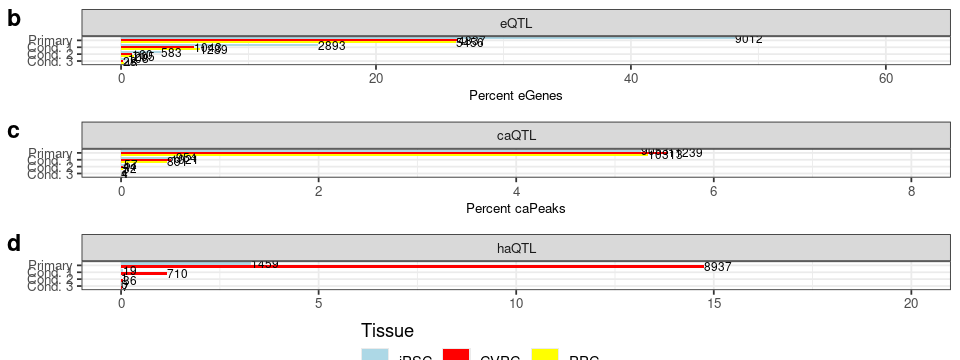

In [4]:
psize(7, 4)
qtl_summary = fread(paste0(repo_path,"SOURCEDATA.FIGURE2BCD.txt"),sep="\t",data.table=F)

qtl_summary = rbind(qtl_summary,data.frame(Tissue = "iPSC", Type = "haQTL",Condition = "Cond. 3", n_qelements = 0, Elements = 45728, Percent = 0))
qtl_summary$Type = factor(qtl_summary$Type, levels = c("eQTL","caQTL","haQTL"))
qtl_summary$Tissue = factor(qtl_summary$Tissue, levels = rev(c("iPSC","CVPC","PPC")))
qtl_summary$Condition = factor(qtl_summary$Condition, levels = rev(c("Primary", paste("Cond.",1:3))))
b = ggplot(qtl_summary[ qtl_summary$Type == "eQTL",],aes(Percent, Condition, fill = Tissue)) + 
        theme_bw2 + geom_bar(stat="identity", position="dodge") + 
        xlim(c(0,62)) +
        theme(legend.position = "none") + 
        xlab("Percent eGenes") + ylab("") +
        facet_grid(~Type, scales="free_x", labeller = label_value) + 
        scale_fill_manual(values = rev(c("lightblue", "red", "yellow"))) + 
        guides(fill = guide_legend(reverse = TRUE)) +   
            geom_text(aes(label = n_qelements), 
            position = position_dodge(width = 0.9), 
            vjust = 0.5, hjust=0, size =2.5) 

c = ggplot(qtl_summary[ qtl_summary$Type == "caQTL",],aes(Percent, Condition, fill = Tissue)) + 
        theme_bw2 + geom_bar(stat="identity", position="dodge") + 
        xlim(c(0,8)) +
        theme(legend.position = "none")  + ylab("") + xlab("Percent caPeaks") +
        facet_grid(~Type, scales="free_x", labeller = label_value) + 
        scale_fill_manual(values = rev(c("lightblue", "red", "yellow"))) + 
        guides(fill = guide_legend(reverse = TRUE, title.position = "top", nrow =2)) +   
            geom_text(aes(label = n_qelements), 
            position = position_dodge(width = 0.9), 
            vjust = 0.5, hjust=0, size =2.5) 

mock = ggplot(qtl_summary[ qtl_summary$Type == "caQTL",],aes(Percent, Condition, fill = Tissue))  +
        geom_bar(stat="identity", position="dodge") + 
        scale_fill_manual(values = rev(c("lightblue", "red", "yellow"))) + 
        guides(fill = guide_legend(reverse = TRUE, title.position = "top", nrow =1)) +   
            geom_text(aes(label = n_qelements), 
            position = position_dodge(width = 0.9), 
            vjust = 0.5, hjust=0, size =2.5) 
legend = get_legend(mock)
legend
d = ggplot(qtl_summary[ qtl_summary$Type == "haQTL",],aes(Percent, Condition, fill = Tissue)) + 
        theme_bw2 + geom_bar(stat="identity", position="dodge") + 
        theme(legend.position = "none" ) + 
        xlab("Percent haPeaks") + ylab("") +
        xlim(c(0,20)) +
        facet_grid(~Type, scales="free_x", labeller = label_value) + 
        scale_fill_manual(values = rev(c("lightblue", "red"))) + 
        guides(fill = guide_legend(reverse = TRUE,title.position = "top", nrow =2)) +   
            geom_text(aes(label = n_qelements), 
            position = position_dodge(width = 0.9), 
            vjust = 0.5, hjust=0, size =2.5 ) 

psize(8,3)
bcd = plot_grid(b,c,d,legend,nrow=4, align = "v", rel_heights = c(1,1,1,0.2),labels=c("b","c","d"))
bcd


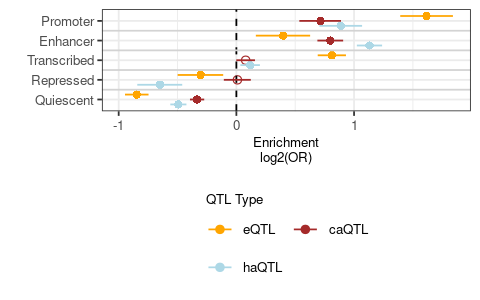

In [5]:
cvpc_enrich = fread(paste0(repo_path,"SOURCEDATA.FIGURE2E.txt"),sep="\t",data.table=F)

plot_enrichments = function(enrich_res) {
     enrich_res$`QTL Type` = factor(enrich_res$QTL , levels = c("haQTL","caQTL","eQTL"))
     enrich_res$State = factor(enrich_res$State, levels=rev(c("Promoter","Enhancer","Transcribed",
                                                                  "Repressed","Quiescent")))
    enrich_res$`log2(OR)` = log2(enrich_res$Odds.Ratio)
    enrich_res$log2Low = log2(enrich_res$LowerCI)
    enrich_res$log2Hi = log2(enrich_res$UpperCI)
    enrich_res$significant = ifelse(enrich_res$Pvalue > 0.05, "FALSE","TRUE")
    g= ggplot(enrich_res, aes(`log2(OR)`, State, color = `QTL Type`, group=`QTL Type`, shape=significant)) + theme_bw() +
            xlim(c(-1,1.85))+ ylab("") + xlab("Enrichment\nlog2(OR)") +
            theme_bw2 + theme(legend.position = "right") +
            geom_point(na.rm=TRUE, position=position_dodge(width=0.75),size=2) +
            geom_vline(xintercept = 0,lty =2 ) +
            geom_linerange(aes(x=`log2(OR)`, xmin=log2Low, xmax=log2Hi), 
                  na.rm=TRUE, position=position_dodge(width=0.75)) +
            scale_color_manual(values = rev(c("orange","brown","lightBlue"))) + 
            geom_hline(yintercept = 1.5, color = "lightgrey") +
            geom_hline(yintercept = 2.5, color = "lightgrey") +
            geom_hline(yintercept = 3.5, color = "lightgrey") +
            geom_hline(yintercept = 4.5, color = "lightgrey") +
            scale_shape_manual(values = c(1, 16), guide = "none") 
    return(g)
}

psize(4,2.5)

e = plot_enrichments(cvpc_enrich)
e = e + theme(legend.position = "bottom") + 
                    guides(col = guide_legend(nrow = 2, theme = theme(legend.byrow = TRUE),reverse=TRUE,
                                             title.position = "top"))

e

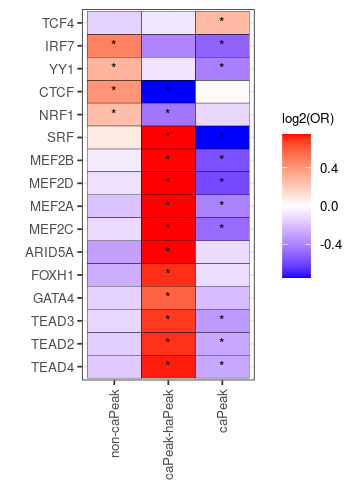

In [6]:
atac_tfbs_enrich=fread(paste0(repo_path,"SOURCEDATA.FIGURE2F.txt"),sep="\t",data.table=F)
psize(3, 4.2)

top_tfs = atac_tfbs_enrich[  atac_tfbs_enrich$estimate > 1 & atac_tfbs_enrich$padj < 0.05,] %>% 
                                group_by(Annotation) %>%
                                top_n(10, log2r)

top_tfs = c(top_tfs$TF,"GATA4")

atac_tfbs_enrich2 = atac_tfbs_enrich[ atac_tfbs_enrich$TF %in% top_tfs, ]
atac_tfbs_enrich2$'log2(OR)' = atac_tfbs_enrich2$log2r
atac_tfbs_enrich2$'log2(OR)'[ atac_tfbs_enrich2$'log2(OR)' < -0.75 ] = -0.75
atac_tfbs_enrich2$'log2(OR)'[ atac_tfbs_enrich2$'log2(OR)' > 0.75 ] = 0.75
atac_tfbs_enrich2$Annotation = factor(atac_tfbs_enrich2$Annotation ,
                                      levels = rev(c("caPeak","caPeak-haPeak","non-caPeak")))


atac_tfbs_enrich2_cast = reshape2::dcast(TF ~ Annotation , data = atac_tfbs_enrich2,
                                         fun.aggregate = mean, value.var = "log2(OR)")
rownames(atac_tfbs_enrich2_cast) = atac_tfbs_enrich2_cast$TF
atac_tfbs_enrich2_cast$TF = NULL

ord <- hclust( dist(atac_tfbs_enrich2_cast, method = "euclidean"), method = "ward.D" )$order

atac_tfbs_enrich2$TF2 = factor(atac_tfbs_enrich2$TF, levels = rev(rownames(atac_tfbs_enrich2_cast[ord,])))

atac_tfbs_enrich2$Significance = ifelse(atac_tfbs_enrich2$padj < 0.05, "*", "")

f = ggplot(atac_tfbs_enrich2, aes( Annotation,TF2,  fill= `log2(OR)`)) + theme_bw2+
  geom_tile(color = "black")  +  xlab("") + ylab("") +
    geom_text(aes(label=Significance), color="black", size=3) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
         legend.position ="right") +
  scale_fill_gradient2(low="blue",mid = "white", high="red") 


f

png 
  2

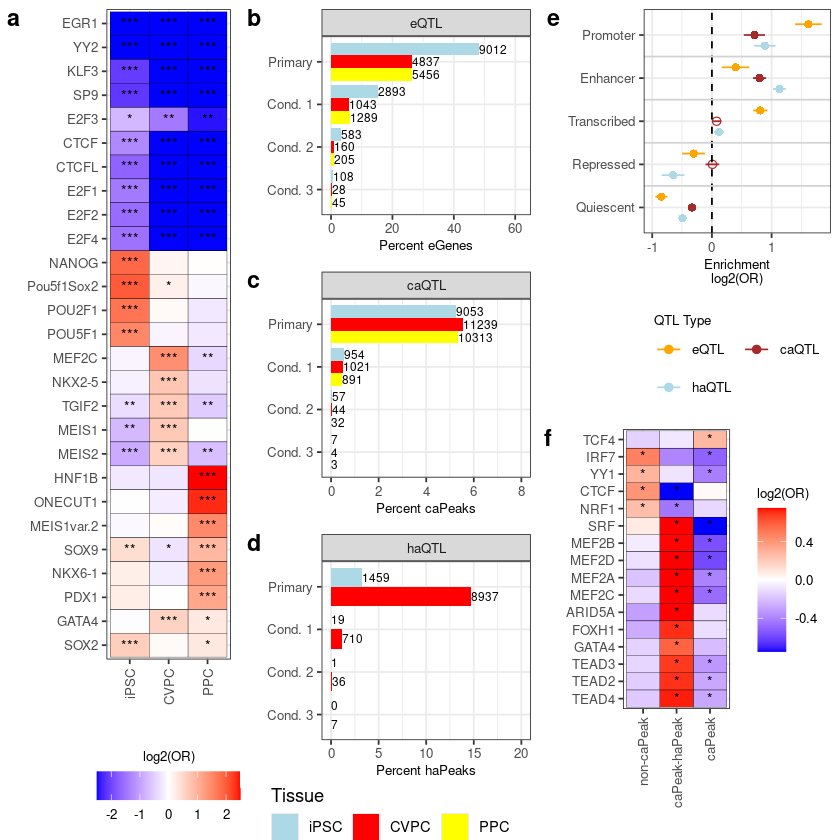

In [14]:
psize(7,7)
# png("figures/figure2_v3.png",units="in",res=300,height=7,width=7)
plot_grid(a,plot_grid(bcd,plot_grid(e,f, nrow=2,labels=c("e","f")),nrow=1),nrow=1,labels =c("a"),rel_widths = c(0.4,1))
# dev.off()

psize(6.5,7)
png("~/projects/Resource/figures/Revisions/figure2.png",units="in",res=300,height=7,width=6.5)

plot_grid(a,plot_grid(bcd,plot_grid(e,f, nrow=2,labels=c("e","f")),nrow=1),nrow=1,labels =c("a"),rel_widths = c(0.4,1))
dev.off()

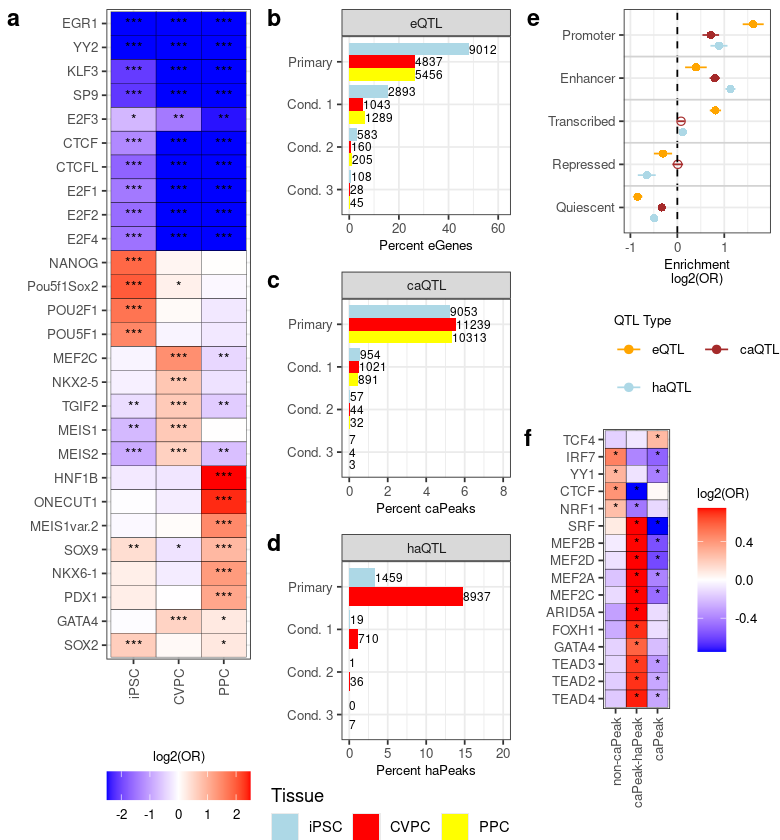

In [22]:
psize(6.5, 7)

plot_grid(a,plot_grid(bcd,plot_grid(e,f, nrow=2,labels=c("e","f")),nrow=1,rel_widths = c(1,1)),nrow=1,labels =c("a"),rel_widths = c(0.5,1))


### Figure in Response to Reviewer #1 

In [64]:
gene_annots = data.frame(Annotation = c("caPeak",rep("non-caPeak",4)), 
                        Description = c("TCF4","IRF7","YY1","CTCF","NRF1"))
gene_annots2 = data.frame(Annotation = rep("caPeak-haPeak",11), 
                        Description = setdiff(unique(atac_tfbs_enrich2$TF),gene_annots$Description))
gene_annots3 = rbind(gene_annots,gene_annots2)

In [16]:

cvpc_tpm = add_rownames(fread("/projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/input/phenotype_tpm_matrix.txt",
                       sep="\t",data.table =F))

In [30]:
gtex_paths = c("/projects/CARDIPS/analysis/epigenome_resource/analyses/tim/gtex/gene_tpm_2017-06-05_v8_artery_aorta.gct",
               "/projects/CARDIPS/analysis/epigenome_resource/analyses/tim/gtex/gene_tpm_2017-06-05_v8_artery_coronary.gct",
               "/projects/CARDIPS/analysis/epigenome_resource/analyses/tim/gtex/gene_tpm_2017-06-05_v8_heart_atrial_appendage.gct",
               "/projects/CARDIPS/analysis/epigenome_resource/analyses/tim/gtex/gene_tpm_2017-06-05_v8_heart_left_ventricle.gct")

In [33]:
melt_gtex = rbindlist(lapply(gtex_paths,function(path){
    tpm = fread(path, sep="\t",data.table=F) %>% filter(Description %in% atac_tfbs_enrich2$TF)
    tpm_melt = melt(tpm[ ,3:ncol(tpm)])
    tpm_melt$tissue = ifelse(grepl("aorta",path), "Aorta",ifelse(grepl("coron",path), "Coronary",
                                                       ifelse(grepl("atrial",path), "Atrium","Ventricle")))
    return(tpm_melt)
    
}))

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(tpm[, 3:ncol(tpm)]). In the next version, this warning will become an error.”
Using Description as id variables

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(tpm[, 3:ncol(tpm)]). In the next version, this warning will become an error.”
U

In [47]:
head(melt_gtex)

Description,variable,value,tissue
<chr>,<fct>,<dbl>,<chr>
MEF2D,GTEX-111YS-0526-SM-5GZXJ,70.42,Aorta
ARID5A,GTEX-111YS-0526-SM-5GZXJ,324.30,Aorta
MEF2C,GTEX-111YS-0526-SM-5GZXJ,32.79,Aorta
TEAD3,GTEX-111YS-0526-SM-5GZXJ,130.40,Aorta
SRF,GTEX-111YS-0526-SM-5GZXJ,143.80,Aorta
NRF1,GTEX-111YS-0526-SM-5GZXJ,11.85,Aorta


In [51]:
gene_info = fread("/reference/private/Gencode.v44lift38/gene_info.txt",sep="\t",data.table=F)[,5:6]

cvpc_melt  = melt(merge(gene_info,
              fread("/projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/input/phenotype_tpm_matrix.txt",
              sep="\t",data.table=F) %>% rename(gene_id = V1)) %>% 
                select(!gene_id) %>% filter(gene_name %in% atac_tfbs_enrich2$TF)) %>% 
                rename(Description = gene_name)
cvpc_melt$tissue = "CVPC"

all_melt = rbind(melt_gtex, cvpc_melt)
all_melt$Tissue = factor(all_melt$tissue, levels = c("CVPC","Aorta","Coronary","Atrium","Ventricle"))

Warning message:
“c("The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(merge(gene_info, fread(\"/projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/input/phenotype_tpm_matrix.txt\", ). In the next version, this warning will become an error.", 
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(    sep = \"\\t\", data.tabl

In [76]:
all_melt2 = merge(all_melt,gene_annots3)
all_melt2$Annotation = factor(all_melt2$Annotation, levels = c("caPeak","caPeak-haPeak","non-caPeak"))
all_melt3 = all_melt2[ order(all_melt2$Annotation),]
all_melt3$Description = factor(all_melt3$Description, levels = unique(all_melt3$Description))

In [81]:
psize(8,6)

p = ggplot(all_melt3,aes(Tissue, value)) + theme_bw2 + 
            ylab("Expression (TPM)") +
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                 strip.text = element_text(face = "italic")) +
            geom_boxplot() + 
            facet_wrap(~Description, scales = "free")


In [90]:
g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-r', g$layout$name))
striprt <- which( grepl('strip-r', g$layout$name) | grepl('strip-t', g$layout$name) )

fills <- c(rep("lightBlue",4),rep("yellow",8),"red",rep("yellow",3))
k <- 1
for (i in striprt) {
  j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
  g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
  k <- k+1
}
png("~/projects/Resource/notebooks/toGitHub/supplementalfigures/tf_expression.png",
    res=150,units="in", height = 8, width = 6)
grid::grid.draw(g)
dev.off()

png 
  2

In [84]:
fills

[1] "red"       "yellow"    "yellow"    "yellow"    "yellow"    "yellow"   
 [7] "yellow"    "yellow"    "yellow"    "yellow"    "yellow"    "yellow"   
[13] "lightBlue" "lightBlue" "lightBlue" "lightBlue"